In [1]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPooling2D,GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.layers import PReLU as PRelu


In [2]:



#paths
train_path = 'Sign-language/train'
valid_path = 'Sign-language/valid'
test_path = 'Sign-language/test'

batch_size = 32
image_size = (224, 224)

#data preprcessing
data_preprocessing = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=5,
    zoom_range=0.1,
    horizontal_flip=True, rescale=1.0/255 
)


train_data = data_preprocessing.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

data_augmentation1 = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

valid_data =data_augmentation1.flow_from_directory(
    valid_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)




Found 88308 images belonging to 29 classes.
Found 54 images belonging to 29 classes.


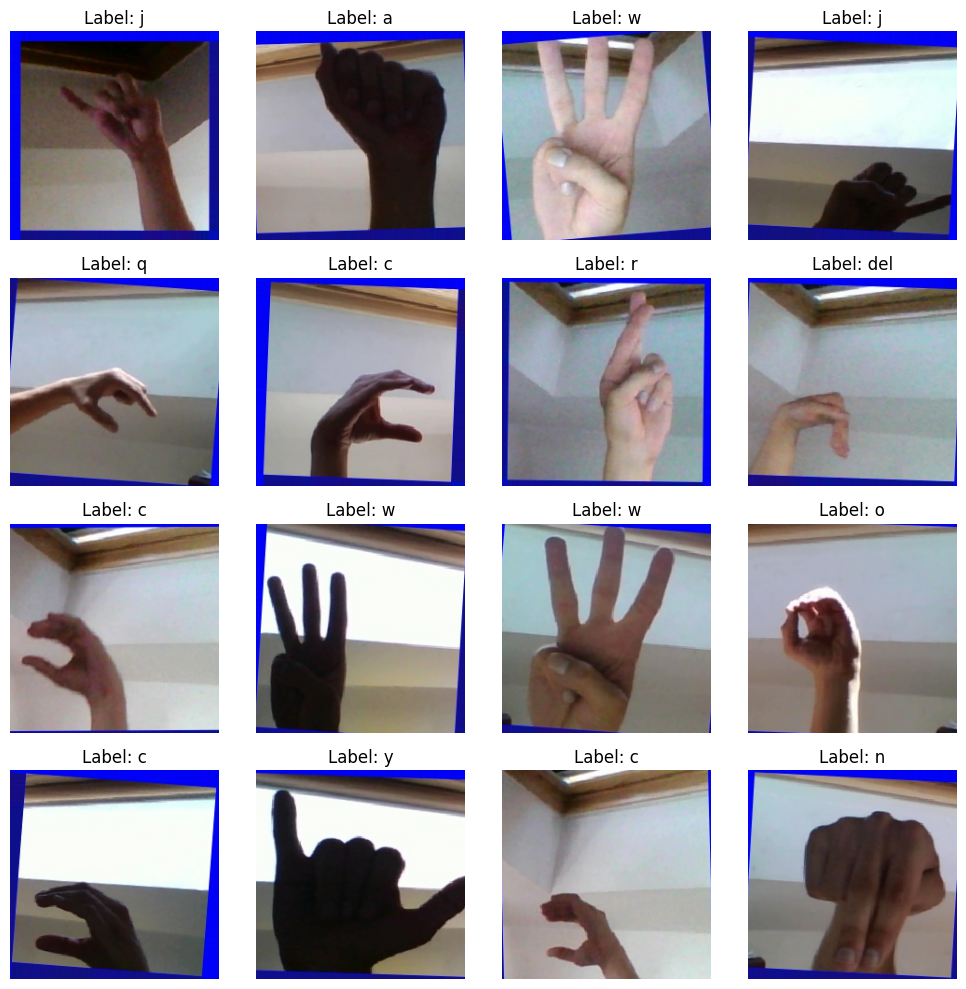

In [3]:
labelss = ['a', 'b', 'c', 'd','del', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n','nothing', 'o', 'p', 'q', 'r', 's','space', 't', 'u', 'v', 'w', 'x', 'y', 'z']
import matplotlib.pyplot as plt
import numpy as np
# Fetch a batch of images and labels from train_data
images, labels = next(train_data)

# Display the images
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i])
    ax.set_title('Label: {}'.format(labelss[np.argmax(labels[i])]))
    ax.axis('off')

plt.tight_layout()
plt.show()
    

In [4]:
# Load pre-trained model (Xception)
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = Sequential()
model.add(base_model)
model.add(BatchNormalization())
model.add(MaxPooling2D(4,4))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'))


model.add(GlobalAveragePooling2D())

model.add(Dense(128, activation=PRelu()))
model.add(Dropout(0.4))
num_classes=29

#output class
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 batch_normalization_4 (Batc  (None, 7, 7, 2048)       8192      
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 2048)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 1, 1, 2048)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 1, 64)          1179712   
                                                                 
 global_average_pooling2d (G  (None, 64)               0

In [5]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
import keras

# # Load pre-trained model (Xception)
# base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Freeze base model layers
# for layer in base_model.layers:
#     layer.trainable = False

# # Build the model
# model = Sequential()
# model.add(base_model)

# # Add regularization to prevent overfitting
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# # Add additional layers
# model.add(MaxPooling2D(4, 4))
# model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', padding='same'))
# # model.add(Dropout(0.1))

# # Flatten and add dense layers
# model.add(Flatten())

# model.add(Dense(32, activation='relu'))


# # Output layer
# model.add(Dense(num_classes, activation='softmax'))

# # Compile the model
# optimizer = keras.optimizers.Adam(learning_rate=0.001)

# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# # Print a summary of the model
# model.summary()


# Define the callback to save the model with the highest val_accuracy
checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)
# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
# Train the model
model.fit(
    train_data,
    validation_data=valid_data,
    epochs=1000,
    callbacks=[early_stopping,checkpoint]
   
)

Epoch 1/100
2760/2760 [==============================] - 907s 324ms/step - loss: 0.7951 - accuracy: 0.7582 - val_loss: 0.9824 - val_accuracy: 0.7407
Epoch 2/100
2760/2760 [==============================] - 880s 319ms/step - loss: 0.4365 - accuracy: 0.8658 - val_loss: 0.9486 - val_accuracy: 0.7778
Epoch 3/100
2760/2760 [==============================] - 845s 306ms/step - loss: 0.3766 - accuracy: 0.8847 - val_loss: 0.7847 - val_accuracy: 0.7778
Epoch 4/100
2760/2760 [==============================] - 821s 297ms/step - loss: 0.3376 - accuracy: 0.8969 - val_loss: 0.7114 - val_accuracy: 0.7593
Epoch 5/100
2760/2760 [==============================] - 807s 292ms/step - loss: 0.3119 - accuracy: 0.9043 - val_loss: 0.9266 - val_accuracy: 0.7407
Epoch 6/100
2760/2760 [==============================] - 802s 290ms/step - loss: 0.2988 - accuracy: 0.9102 - val_loss: 0.5818 - val_accuracy: 0.7778
Epoch 7/100
2760/2760 [==============================] - 829s 300ms/step - loss: 0.2808 - accuracy: 0.9161

KeyboardInterrupt: 

In [6]:
# Load and preprocess the validation data
test_data =data_augmentation1.flow_from_directory(
    valid_path,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)
model.evaluate(test_data)

Found 54 images belonging to 29 classes.


2/2 [==============================] - 1s 90ms/step - loss: 1.0737 - accuracy: 0.7963


[1.073691487312317, 0.7962962985038757]